In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
directory = 'dataset/dataset/'
ori_name = ['AMD.csv', 'FB.csv', 'FSV.csv', 'INFY.csv', 'KNX.csv',
          'MONDY.csv', 'MTDR.csv', 'JINDALSTEL.NS.csv', 'TMUS.csv', 'TSLA.csv', 'TWTR.csv']
stocks = [directory + s for s in ori_name]

In [6]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [7]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_5308\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_5308\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_5308\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_5308\4164625882.py:2: F

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,94.580002,267.570007,141.929993,18.590000,43.470001,51.790001,15.520000,293.799988,135.059998,880.020020,51.480000
1,97.250000,256.839996,137.800003,18.760000,42.709999,50.840000,15.800000,293.049988,132.929993,811.190002,48.180000
2,95.360001,251.089996,135.089996,18.600000,43.250000,51.549999,16.480000,294.399994,128.690002,849.440002,47.040001
3,91.779999,251.639999,135.710007,18.430000,43.470001,50.630001,16.030001,299.750000,128.500000,854.409973,47.220001
4,90.790001,245.639999,137.639999,18.219999,44.480000,51.939999,16.540001,293.649994,124.690002,845.000000,45.790001


In [8]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [9]:
mean_daily_returns * 252

Close_x   -0.427263
Close_y    0.735194
Close_x    0.509847
Close_y   -0.063756
Close_x    0.324793
Close_y    0.280127
Close_x    2.122266
Close_y    1.539646
Close_x   -0.036006
Close_y   -0.524399
Close      0.426694
dtype: float64

In [10]:
volatilities * 252

Close_x     6.690635
Close_y     5.215759
Close_x     4.579849
Close_y     4.135928
Close_x     4.630070
Close_y     4.849706
Close_x    11.648769
Close_y     7.533855
Close_x     4.555902
Close_y    10.963129
Close       9.564248
dtype: float64

In [11]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

C:\Users\Karen Pinto\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


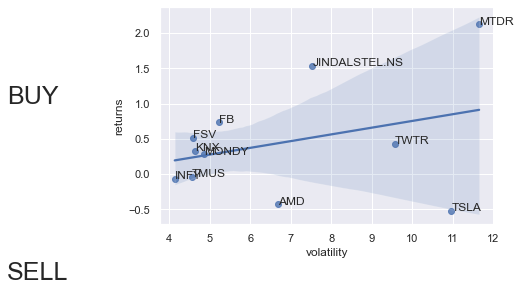

In [12]:
g = sns.regplot("volatility", "returns", data=combine)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()